In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
cd_data = pd.read_csv("CO2 Emissions_Canada.csv")
cd_data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
print("Data type: ", type(cd_data))
print("Data dims: ", cd_data.shape)

Data type:  <class 'pandas.core.frame.DataFrame'>
Data dims:  (7385, 12)


In [4]:
print(cd_data.dtypes)

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object


## Data Cleaning


We will replace all values in Fuel Type with the actual name of each Fuel Type for more clear visualisation.

In [5]:
cd_data["Fuel Type"].replace('X', 'Regular Gasoline', inplace=True)
cd_data["Fuel Type"].replace('Z', 'Premium Gasoline', inplace=True)
cd_data["Fuel Type"].replace('D', 'Diesel', inplace=True)
cd_data["Fuel Type"].replace('E', 'Ethanol', inplace=True)
cd_data["Fuel Type"].replace('N', 'Natural Gas', inplace=True)


We are interested in finding out the relationship between Transmission Type and C02 Emissions. However, the Transmission Type categorical variable has 2 aspects- firstly, the letters (e.g. A, AM etc) which stand for the Transmission Type. Secondly, some of the data have a number next to the letters, which stands for the number of gears each Transmission Type uses. However, same Transmission Types can have different number of gears, e.g. AS5 and AS8. We will create a new column "Gears" to do an analysis to determine if the number of gears is a significant variable in determining the CO2 Emissions(g/km). From our data description file, number of gears ranges from 3 - 10.

In [6]:
cd_data["Gears"] = None

for row in range(len(cd_data)):
    for character in cd_data.iloc[row, 5]:
        if character.isdigit() and character == '1':
            cd_data.at[row, "Gears"] = 10
            break
        elif character.isdigit():
            cd_data.at[row, "Gears"] = int(character)
cd_data

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Gears
0,ACURA,ILX,COMPACT,2.0,4,AS5,Premium Gasoline,9.9,6.7,8.5,33,196,5
1,ACURA,ILX,COMPACT,2.4,4,M6,Premium Gasoline,11.2,7.7,9.6,29,221,6
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Premium Gasoline,6.0,5.8,5.9,48,136,7
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Premium Gasoline,12.7,9.1,11.1,25,255,6
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Premium Gasoline,12.1,8.7,10.6,27,244,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Premium Gasoline,10.7,7.7,9.4,30,219,8
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Premium Gasoline,11.2,8.3,9.9,29,232,8
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Premium Gasoline,11.7,8.6,10.3,27,240,8
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Premium Gasoline,11.2,8.3,9.9,29,232,8


In [7]:
print("Data type: ", type(cd_data))
print("Data dims: ", cd_data.shape)

Data type:  <class 'pandas.core.frame.DataFrame'>
Data dims:  (7385, 13)


In [8]:
print(cd_data.dtypes)

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
Gears                                object
dtype: object


Checking for NULL values in the new "Gears" column

In [9]:
cd_data.isnull().sum()

Make                                  0
Model                                 0
Vehicle Class                         0
Engine Size(L)                        0
Cylinders                             0
Transmission                          0
Fuel Type                             0
Fuel Consumption City (L/100 km)      0
Fuel Consumption Hwy (L/100 km)       0
Fuel Consumption Comb (L/100 km)      0
Fuel Consumption Comb (mpg)           0
CO2 Emissions(g/km)                   0
Gears                               295
dtype: int64

Based on our research, the rows with NULL value in "Gears" column are the vehicles with an AV transmission (i.e. continuously variable transmission). These cars do not have a set number of gears as compared to other normal automatic transmission cars, but instead has 1 special gear that is variable for all driving conditions. So, to clean up the dataset and to ensure each row has a corresponding Gear value, we will replace all NULL values with the value 1. 

In [10]:
cd_data["Gears"].fillna(value=1, inplace=True)

In [11]:
cd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
 12  Gears 

In [12]:
print(cd_data["Gears"].dropna().value_counts())

Gears
6     3259
8     1802
7     1026
9      419
5      307
1      295
10     210
4       67
Name: count, dtype: int64


Now that the "Gears" column has been cleaned up, we will do an analysis on the "Gears" variable with respect to the "CO2 Emissions (g/km)" variable, to determine if the number of gears is a significant variable in predicting the amount of CO2 emissions of a car. 

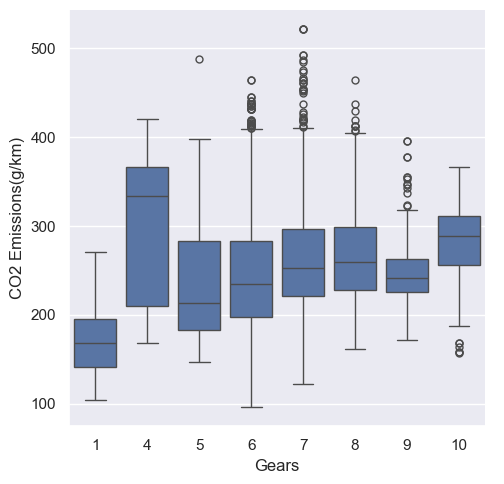

In [13]:
sb.catplot(data=cd_data, x="Gears", y="CO2 Emissions(g/km)", kind='box')

<Axes: xlabel='Gears', ylabel='CO2 Emissions(g/km)'>

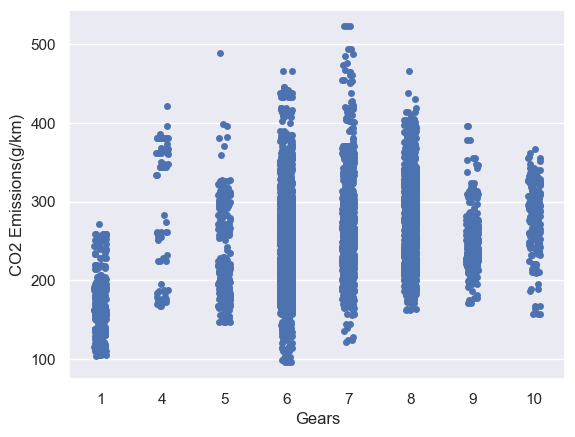

In [14]:
sb.stripplot(data=cd_data, x="Gears", y="CO2 Emissions(g/km)")

In [15]:
#how to justify if gears is significant though? Do we use SelectKBest? This justification should be done before 
# we do the regression right or am i wrong? 

We will also create a new Transmission Type column (A, AM, AS, AV, M) to do a separate analysis using the Transmission type of the car. 

In [16]:
cd_data["Transmission Type"] = None
for row in range(len(cd_data)):
    for characters in cd_data.iloc[row, 5]:
        if characters.isalpha():
            if cd_data.at[row, "Transmission Type"] == None:
                cd_data.at[row, "Transmission Type"] = characters
            else:
                cd_data.at[row, "Transmission Type"] += characters
        elif characters.isdigit():
            break
cd_data

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Gears,Transmission Type
0,ACURA,ILX,COMPACT,2.0,4,AS5,Premium Gasoline,9.9,6.7,8.5,33,196,5,AS
1,ACURA,ILX,COMPACT,2.4,4,M6,Premium Gasoline,11.2,7.7,9.6,29,221,6,M
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Premium Gasoline,6.0,5.8,5.9,48,136,7,AV
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Premium Gasoline,12.7,9.1,11.1,25,255,6,AS
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Premium Gasoline,12.1,8.7,10.6,27,244,6,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Premium Gasoline,10.7,7.7,9.4,30,219,8,AS
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Premium Gasoline,11.2,8.3,9.9,29,232,8,AS
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Premium Gasoline,11.7,8.6,10.3,27,240,8,AS
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Premium Gasoline,11.2,8.3,9.9,29,232,8,AS


In [17]:
cd_data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
Gears                               0
Transmission Type                   0
dtype: int64

## Data Exploration

Next, we will do a univariate exploration of some variables that we would like to use in our numeric prediction
of the CO2 emissions of a car. These variables are namely: Vehicle Class (Categorical), Engine Size (L) (Numeric), Cylinders (Categorical), Fuel Type (Categorical), Fuel Consumption Comb (L/100km) (Numeric) and Gears (Categorical), Transmission Type (Categorical).

### We will first start off with the Numeric Variables (Engine Size and Fuel Consumption Comb). 

In [18]:
cd_data["Engine Size(L)"].describe()

count    7385.000000
mean        3.160068
std         1.354170
min         0.900000
25%         2.000000
50%         3.000000
75%         3.700000
max         8.400000
Name: Engine Size(L), dtype: float64

Note that the data provided has some similar features, namely Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km), Fuel Consumption Comb (L/100 km)and Fuel Consumption Comb (mpg). Upon researching into these labels, we found that the first 2 features simply mean the amount (in Litres) of fuel consumed by the car for every 100km in cities and on highways respectively. The third feature (Fuel Consumption Comb (L/100 km)) is the weighted sum of the first 2 columns, based on how frequent cars spend on roads in the city vs the highway (55% in cities and 45% in highways). The last feature simply converts units of fuel consumption from Litre per 100km, to miles per imperial gallon.

Hence, out of these 4 features, we chose Fuel Consumption Comb (L/100 km) as it paints the most accurate picture of the fuel consumption of each car, and is presented in metric units which makes it easier for us and our client to understand and derive insights from.

In [19]:
cd_data["Fuel Consumption Comb (L/100 km)"].describe()

count    7385.000000
mean       10.975071
std         2.892506
min         4.100000
25%         8.900000
50%        10.600000
75%        12.600000
max        26.100000
Name: Fuel Consumption Comb (L/100 km), dtype: float64

<Axes: xlabel='Fuel Consumption Comb (L/100 km)'>

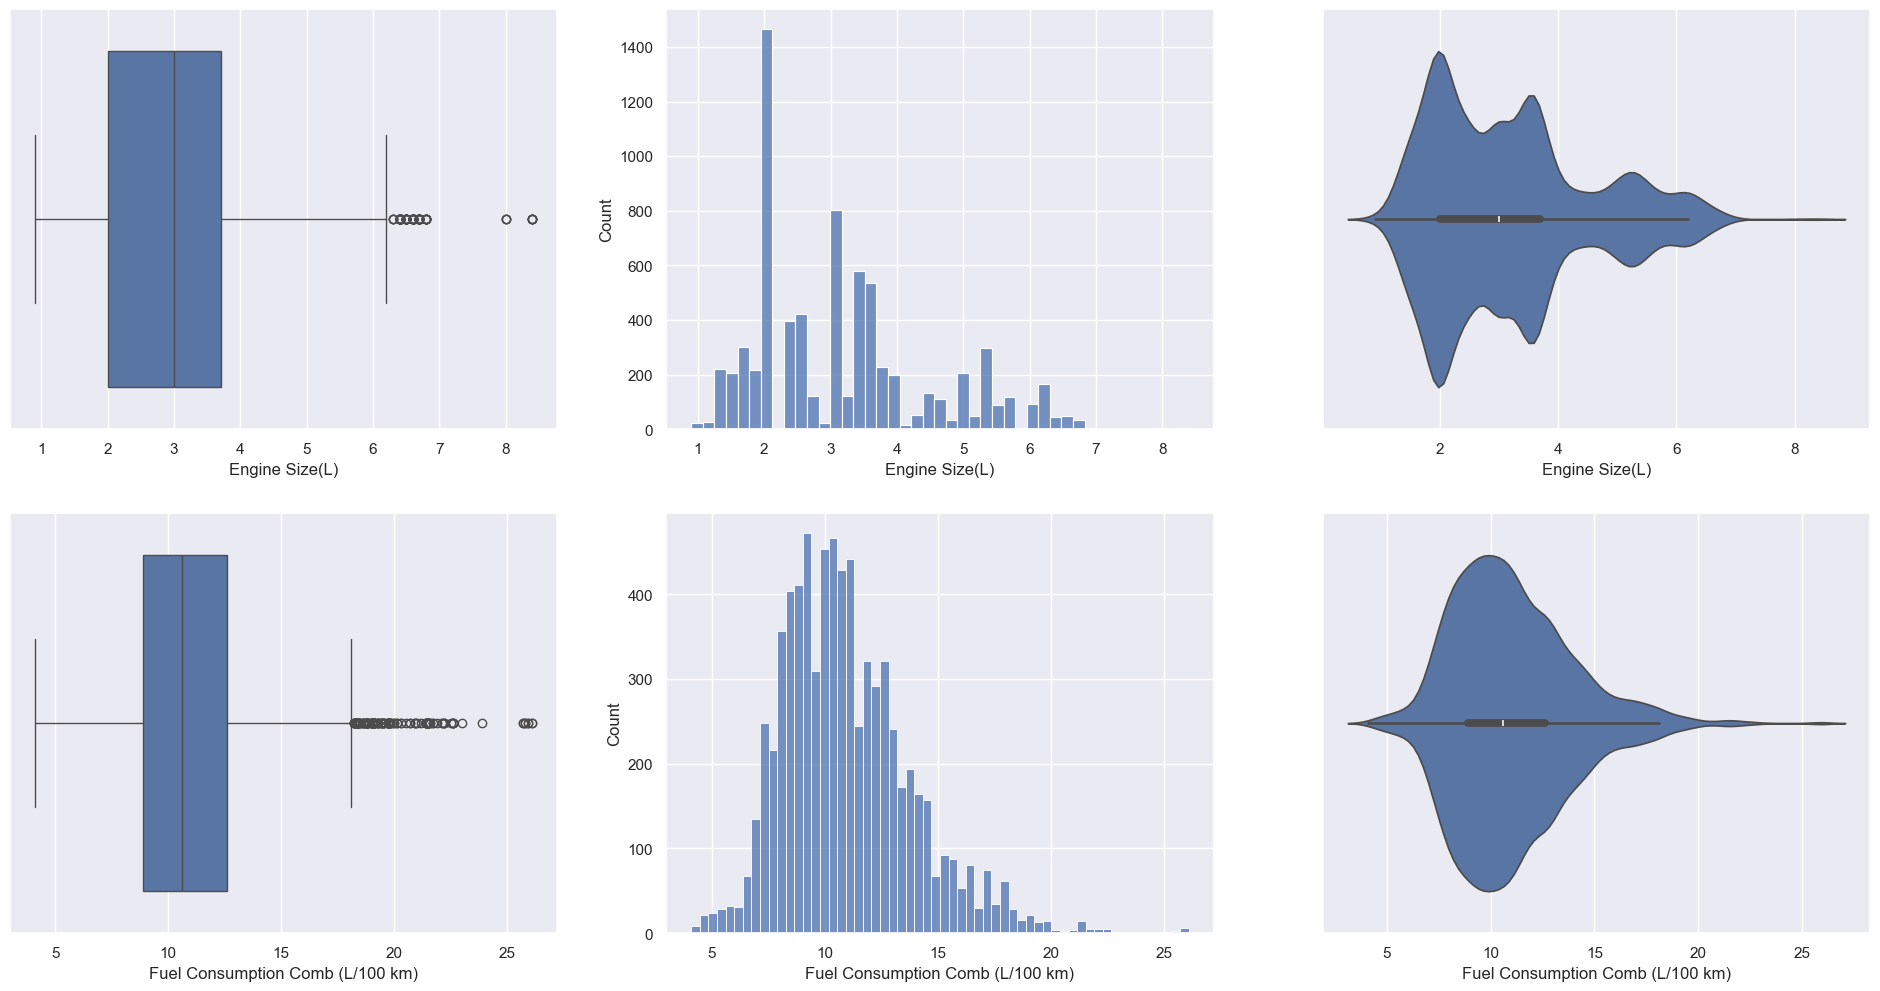

In [20]:
f, axes = plt.subplots(2, 3, figsize = (24, 12))
sb.boxplot(data=cd_data["Engine Size(L)"], orient='h', ax=axes[0,0])
sb.histplot(data=cd_data["Engine Size(L)"], ax=axes[0,1])
sb.violinplot(data=cd_data["Engine Size(L)"], orient='h', ax=axes[0,2])

sb.boxplot(data=cd_data["Fuel Consumption Comb (L/100 km)"], orient='h', ax=axes[1,0])
sb.histplot(data=cd_data["Fuel Consumption Comb (L/100 km)"], ax=axes[1,1])
sb.violinplot(data=cd_data["Fuel Consumption Comb (L/100 km)"], orient='h', ax=axes[1,2])

Accounting for skew of each numeric variable:

In [21]:
print("The skew for Engine Size: ", cd_data["Engine Size(L)"].skew())
print("The skew for Fuel Consumption Comb: ", cd_data["Fuel Consumption Comb (L/100 km)"].skew())

The skew for Engine Size:  0.8091809893113103
The skew for Fuel Consumption Comb:  0.893315721747063


In [22]:
print(f'Engine Size (L) kurtosis = {cd_data["Engine Size(L)"].kurt()}')
print(f'Fuel Consumption Comb (L/100km) kurtosis = {cd_data["Fuel Consumption Comb (L/100 km)"].kurt()}')


Engine Size (L) kurtosis = -0.1319632848497747
Fuel Consumption Comb (L/100km) kurtosis = 1.393575350888704


Since the kurtosis of Engine Size is < 0, Engine Size (L) is said to be platykurtic while Fuel Consumption Comb (L/100km) is said to be leptokurtic since its kurtosis is > 0. The magnitude of the kurtosis of both variables are deemed to be acceptable and close to a normal value (which is 0).
Similarly both variables are positively skewed, but since their values are less than 1, the magnitude of their skewness are also deemed to be acceptable.
Next, we will do a univariate exploration of the categorical variables (Vehicle Class, Cylinders, Fuel Type, Gears, Transmission Type)


### Next, we will do a univariate exploration of the categorical variables (Vehicle Class, Cylinders, Fuel Type, Gears, Transmission Type)

In [23]:
cd_data["Vehicle Class"].value_counts()

Vehicle Class
SUV - SMALL                 1217
MID-SIZE                    1133
COMPACT                     1022
SUV - STANDARD               735
FULL-SIZE                    639
SUBCOMPACT                   606
PICKUP TRUCK - STANDARD      538
TWO-SEATER                   460
MINICOMPACT                  326
STATION WAGON - SMALL        252
PICKUP TRUCK - SMALL         159
MINIVAN                       80
SPECIAL PURPOSE VEHICLE       77
VAN - PASSENGER               66
STATION WAGON - MID-SIZE      53
VAN - CARGO                   22
Name: count, dtype: int64

In [24]:
cd_data["Cylinders"].value_counts()

Cylinders
4     3220
6     2446
8     1402
12     151
3       95
10      42
5       26
16       3
Name: count, dtype: int64

In [25]:
cd_data["Fuel Type"].value_counts()

Fuel Type
Regular Gasoline    3637
Premium Gasoline    3202
Ethanol              370
Diesel               175
Natural Gas            1
Name: count, dtype: int64

In [26]:
cd_data["Gears"].value_counts()

Gears
6     3259
8     1802
7     1026
9      419
5      307
1      295
10     210
4       67
Name: count, dtype: int64

A side note: we found it interesting that there were no cars with 2 or 3 gears, and all cars with 1 gear were of the AV Transmission Type (as mentioned above, it is the Transmission Type that uses one special variable gear). We did some further research and found out that generally, car makers prefer number of gears in modern cars to be around 6-8, as it is the optimal number for balance and performance. However, the number of gears of a car does not have a clear relationship with the CO2 Emissions it produces- we shall therefore try to explore this relationship (if there is one) further below. We will assume that the Number of Gears does indeed have a relationship with CO2 Emissions, and proceed using Number of Gears as a categorical predictor variable.

In [27]:
cd_data["Transmission Type"].value_counts()

Transmission Type
AS    3127
A     1851
M     1185
AM     646
AV     576
Name: count, dtype: int64

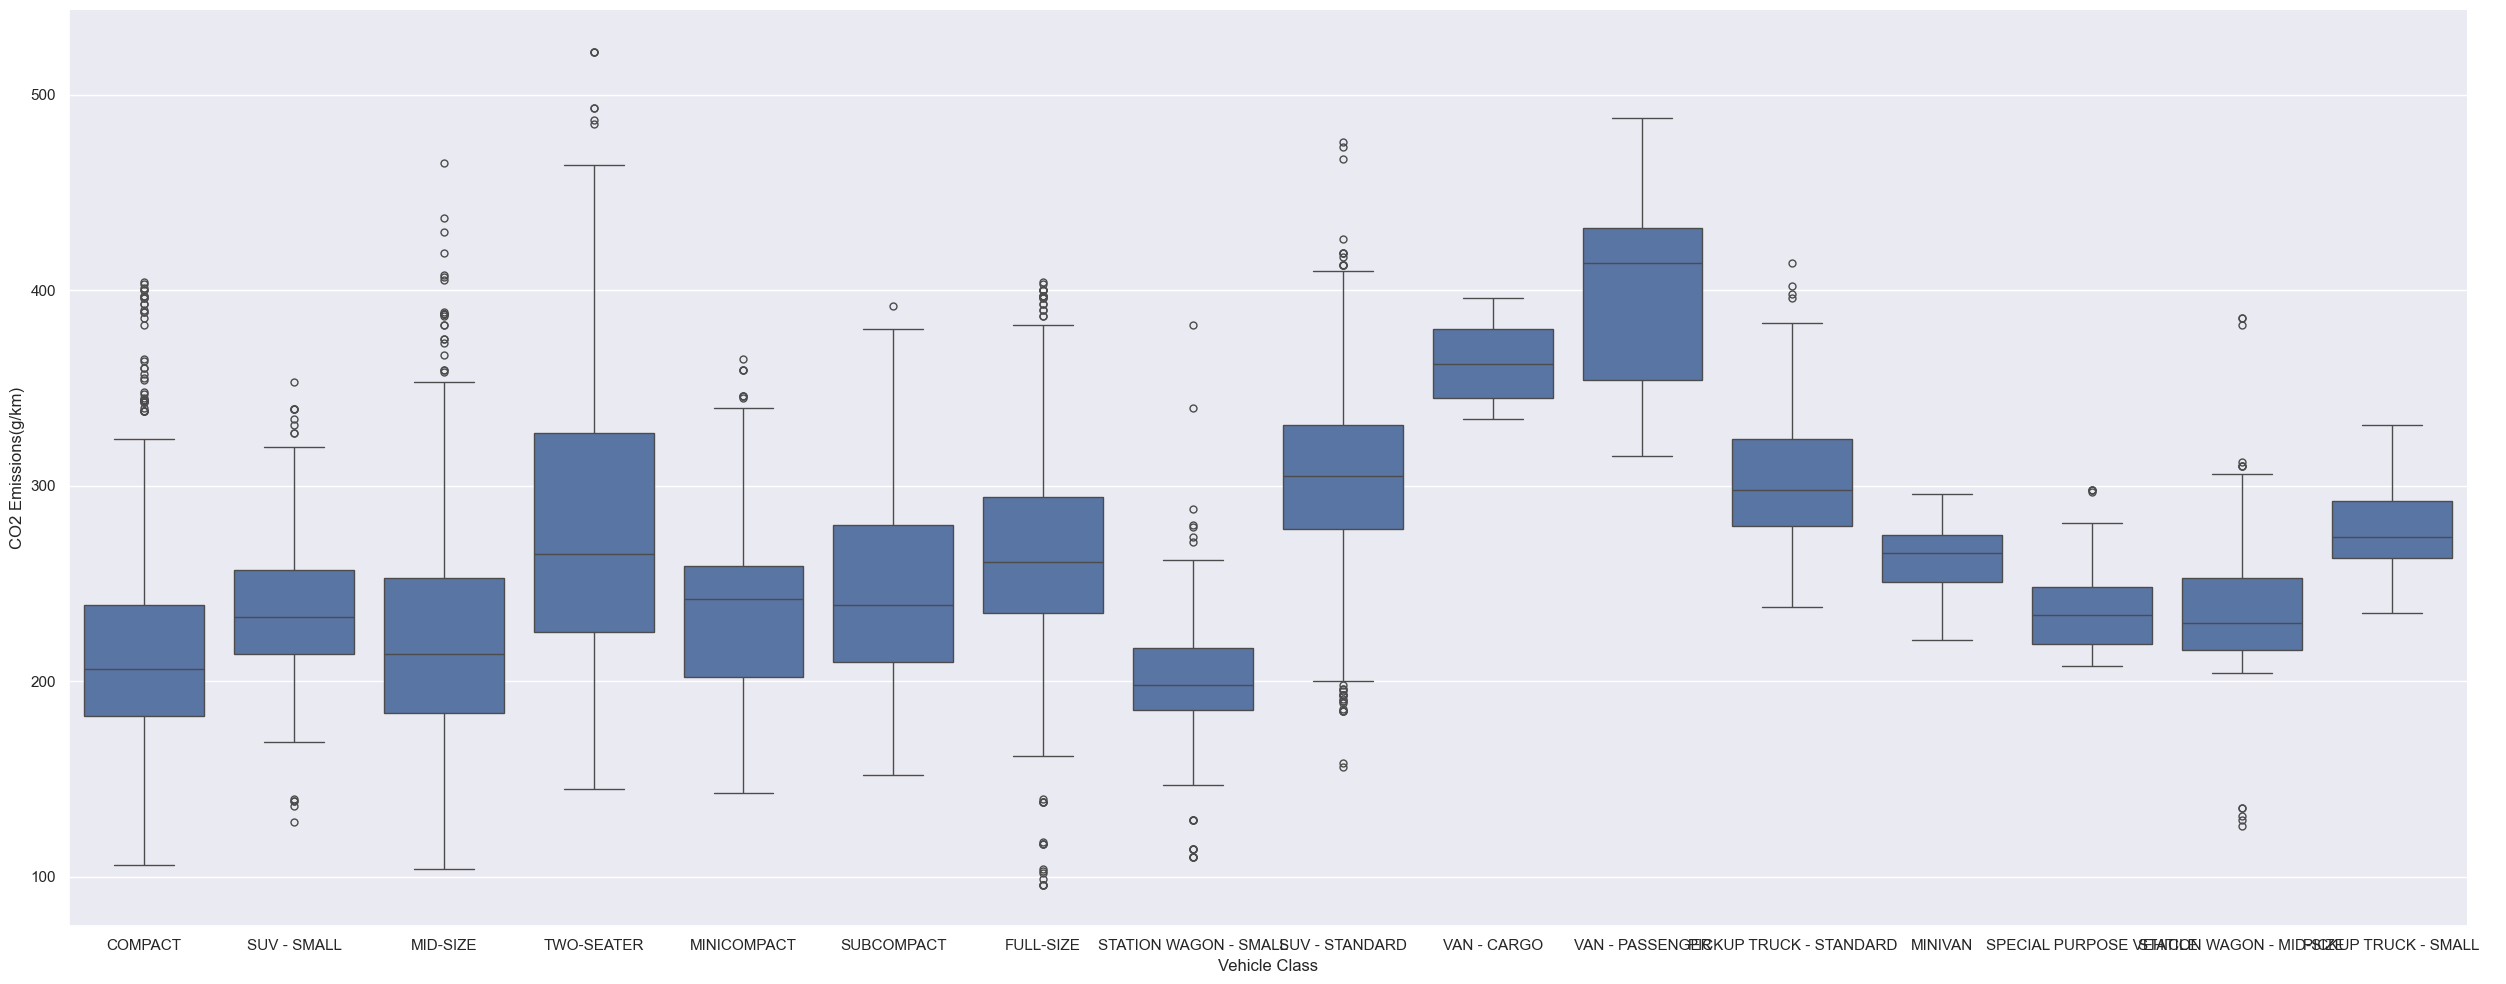

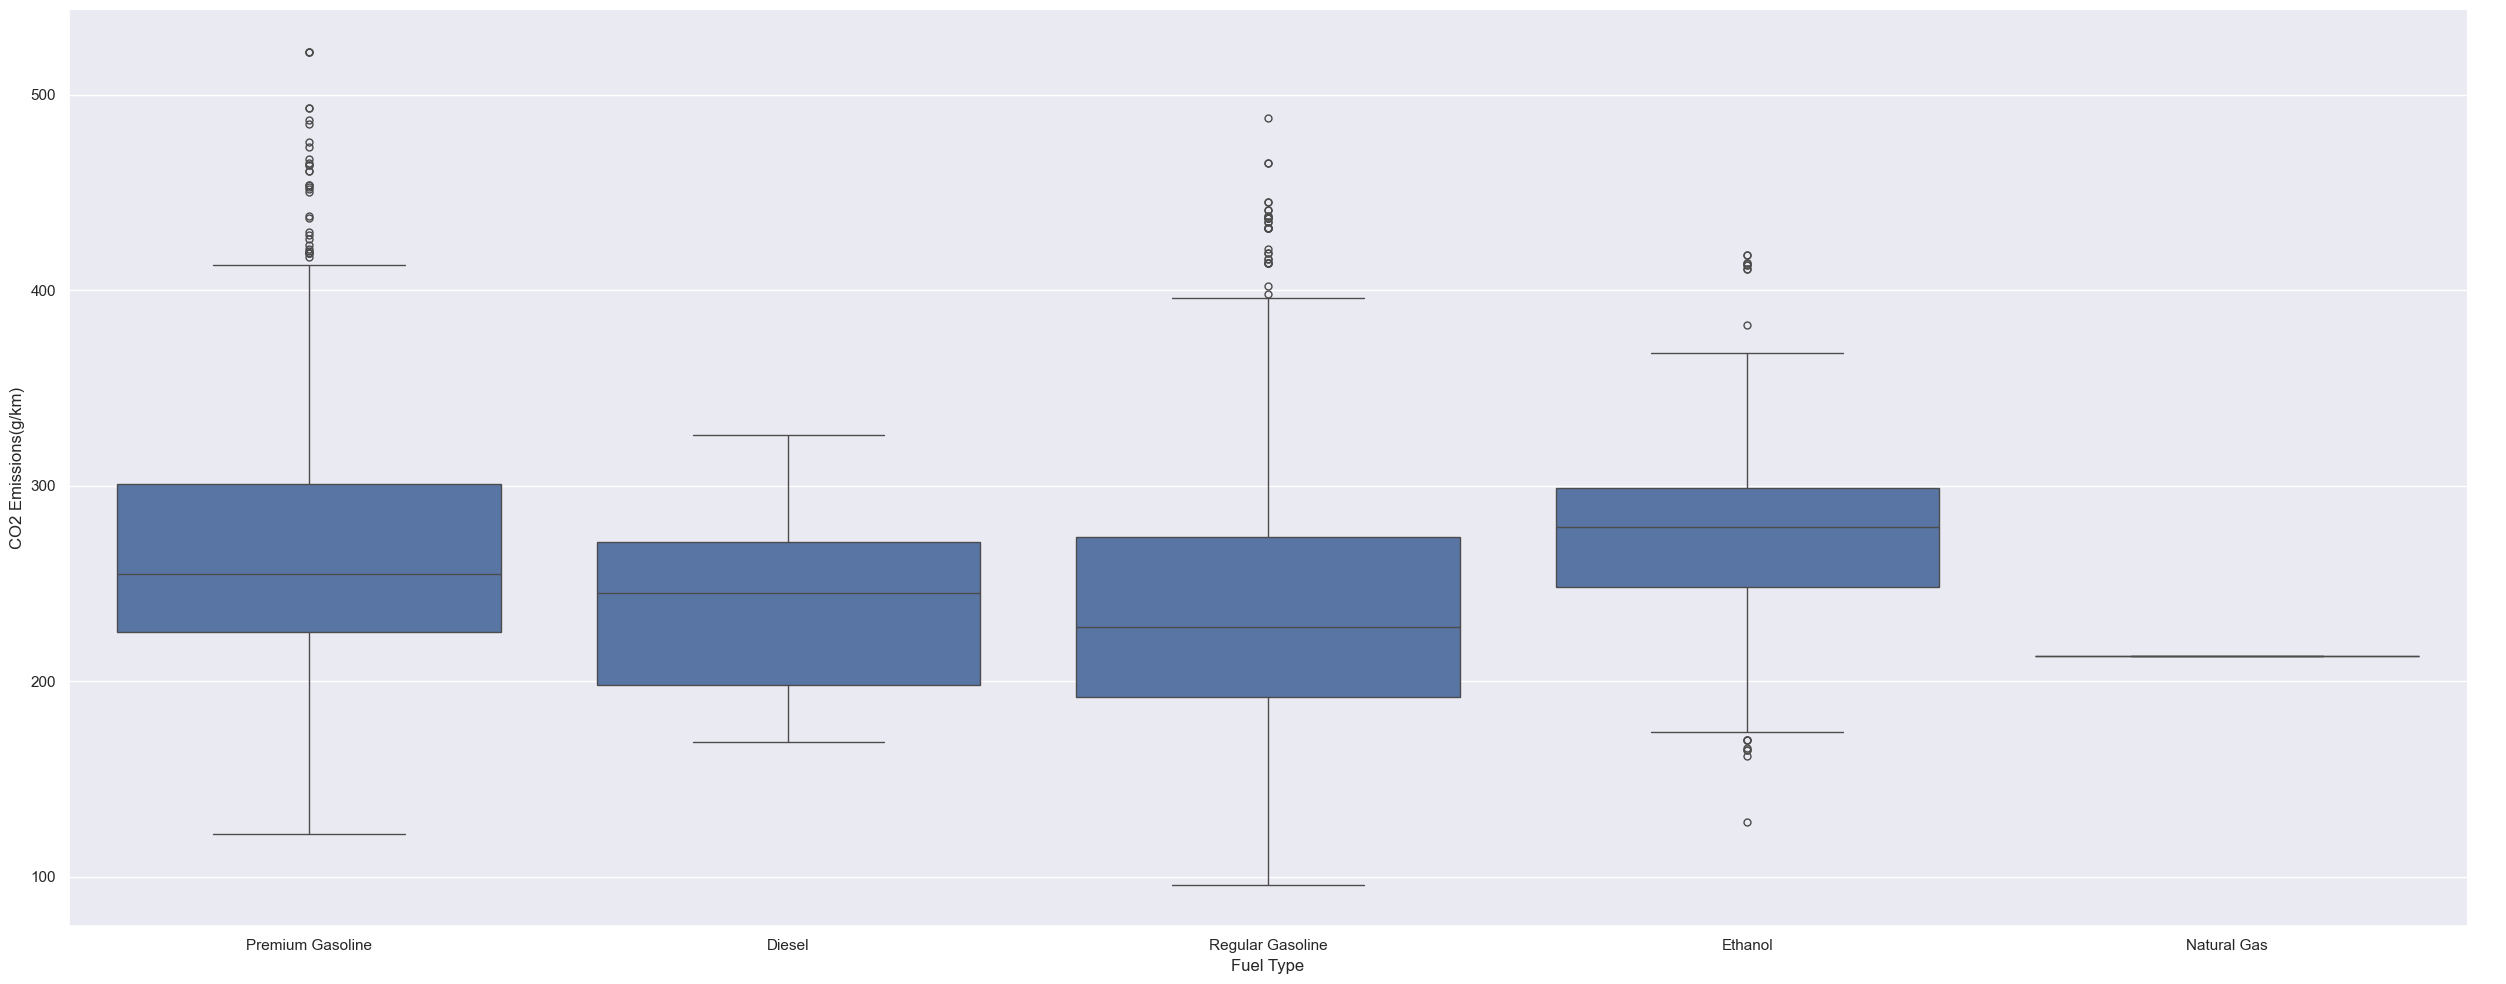

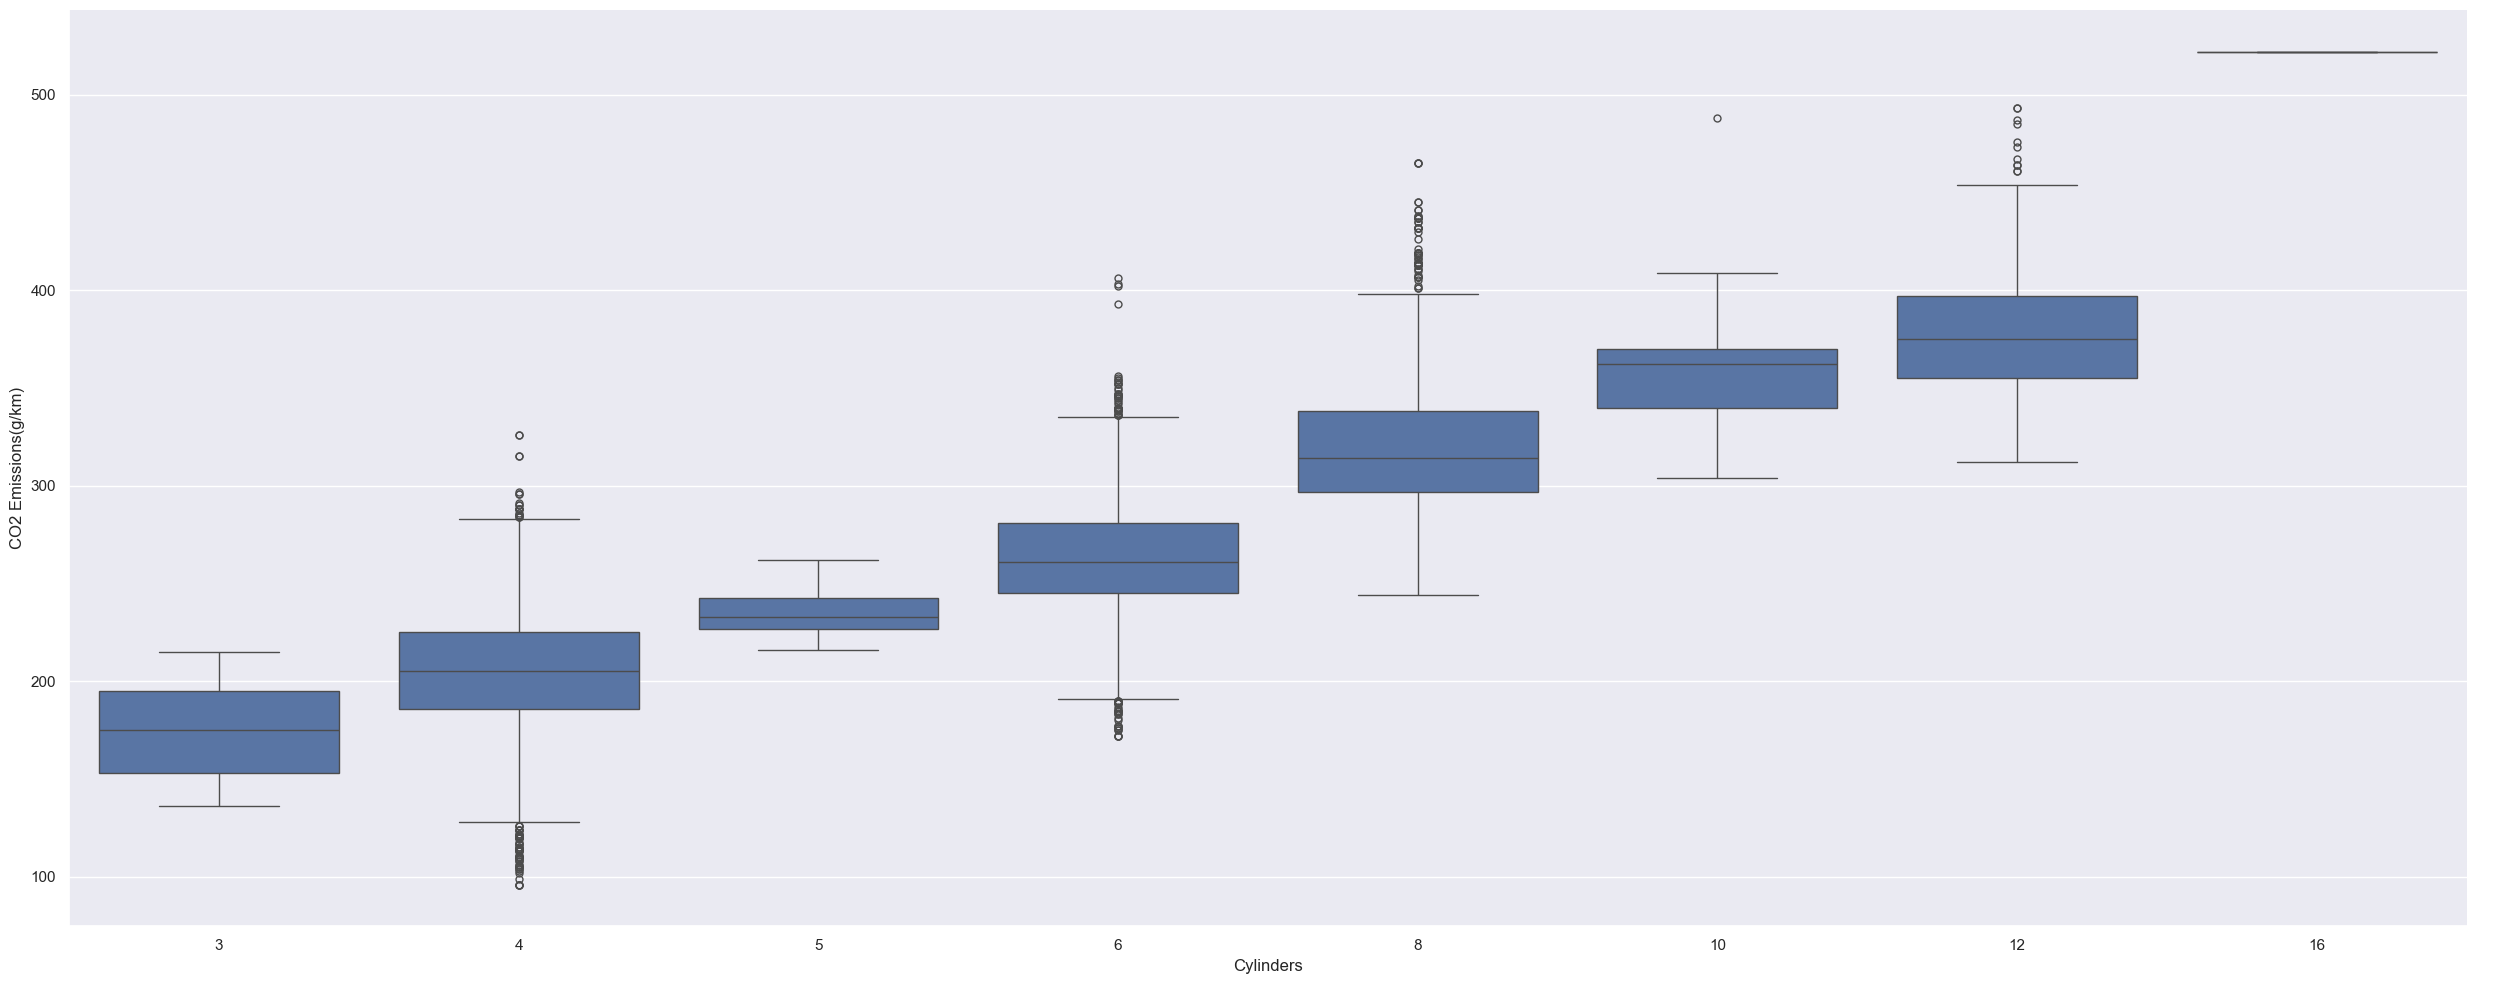

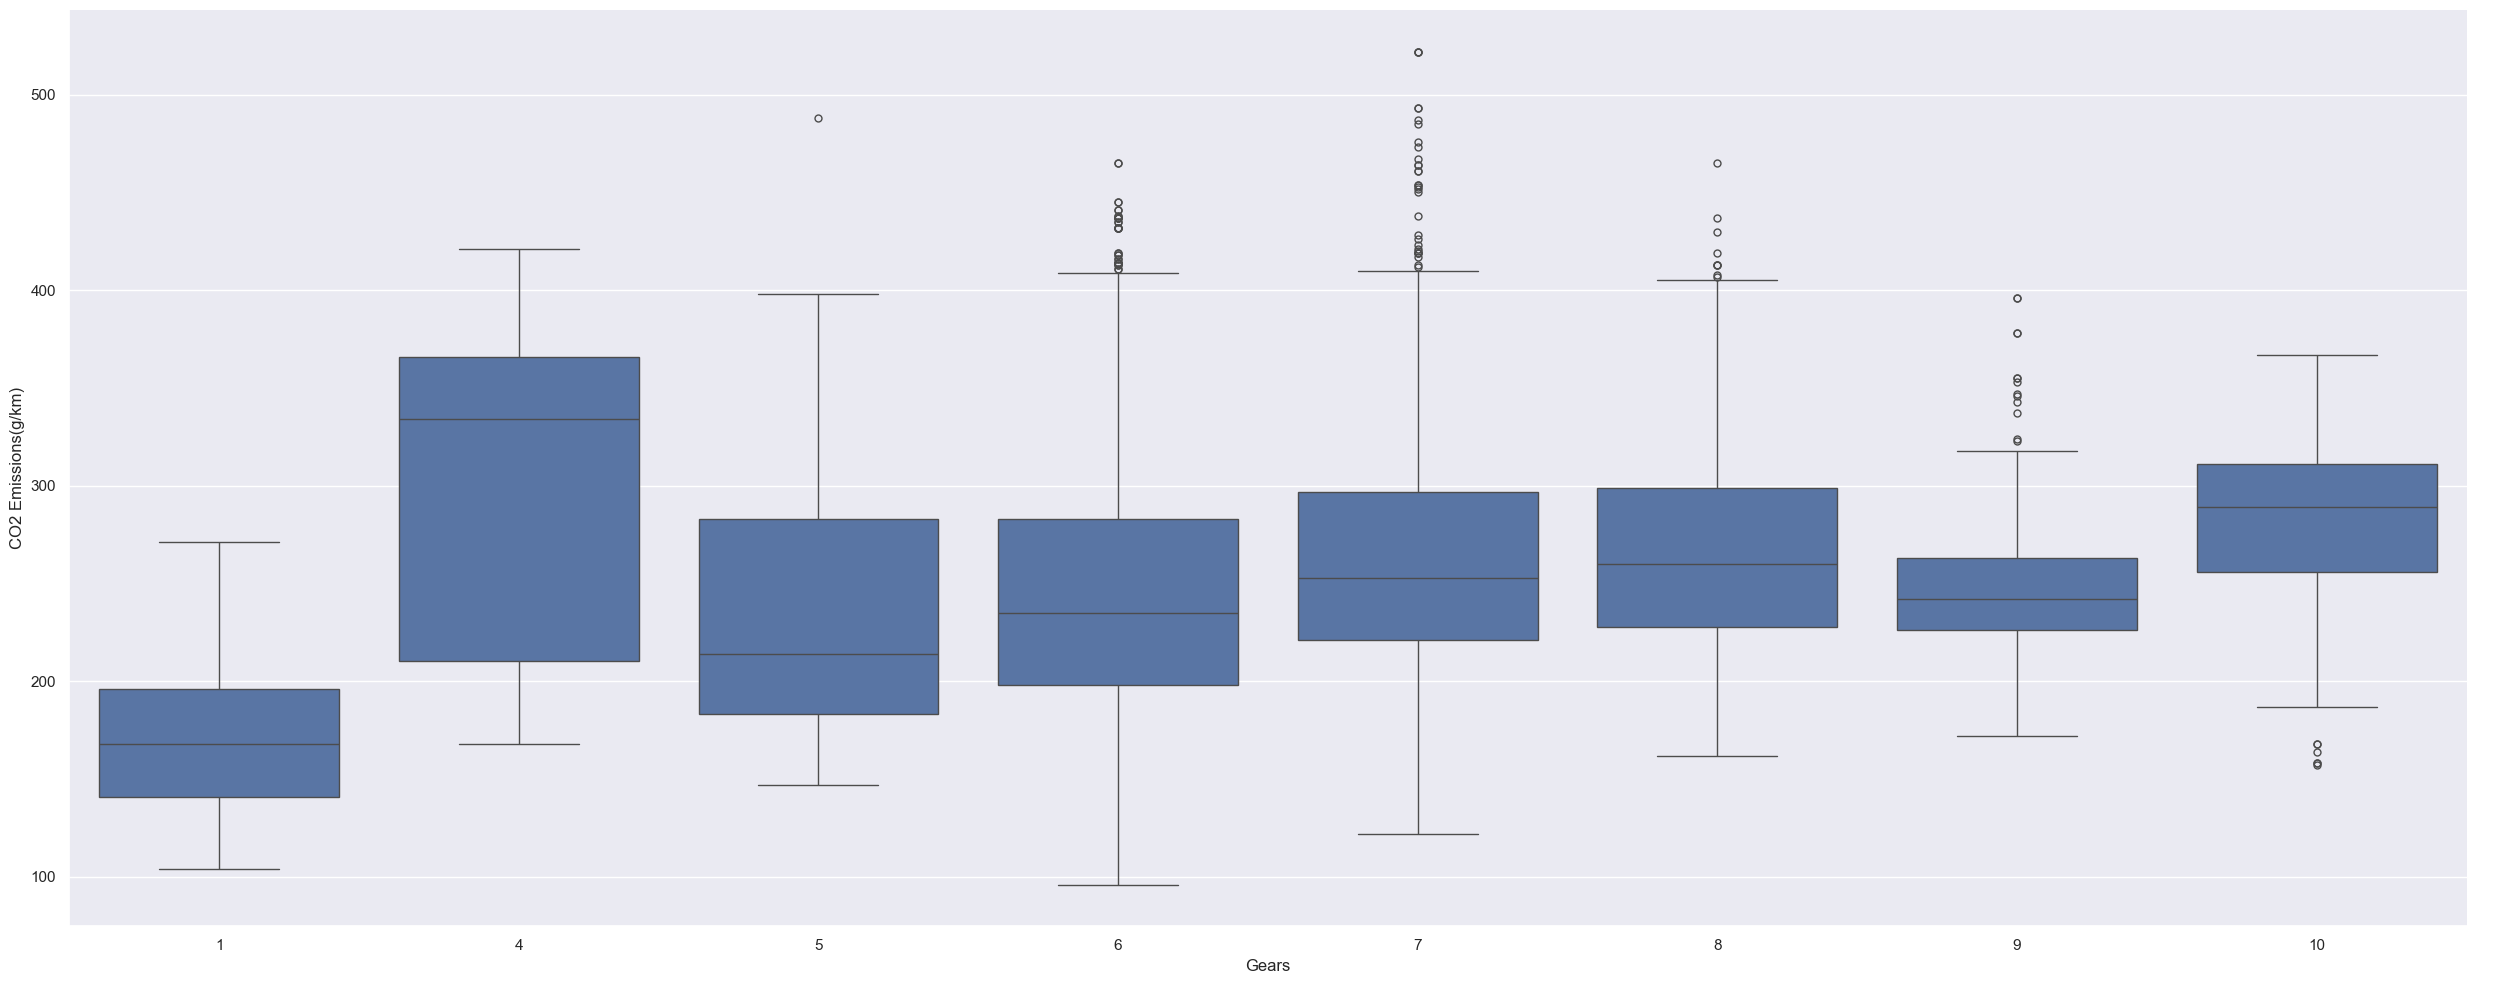

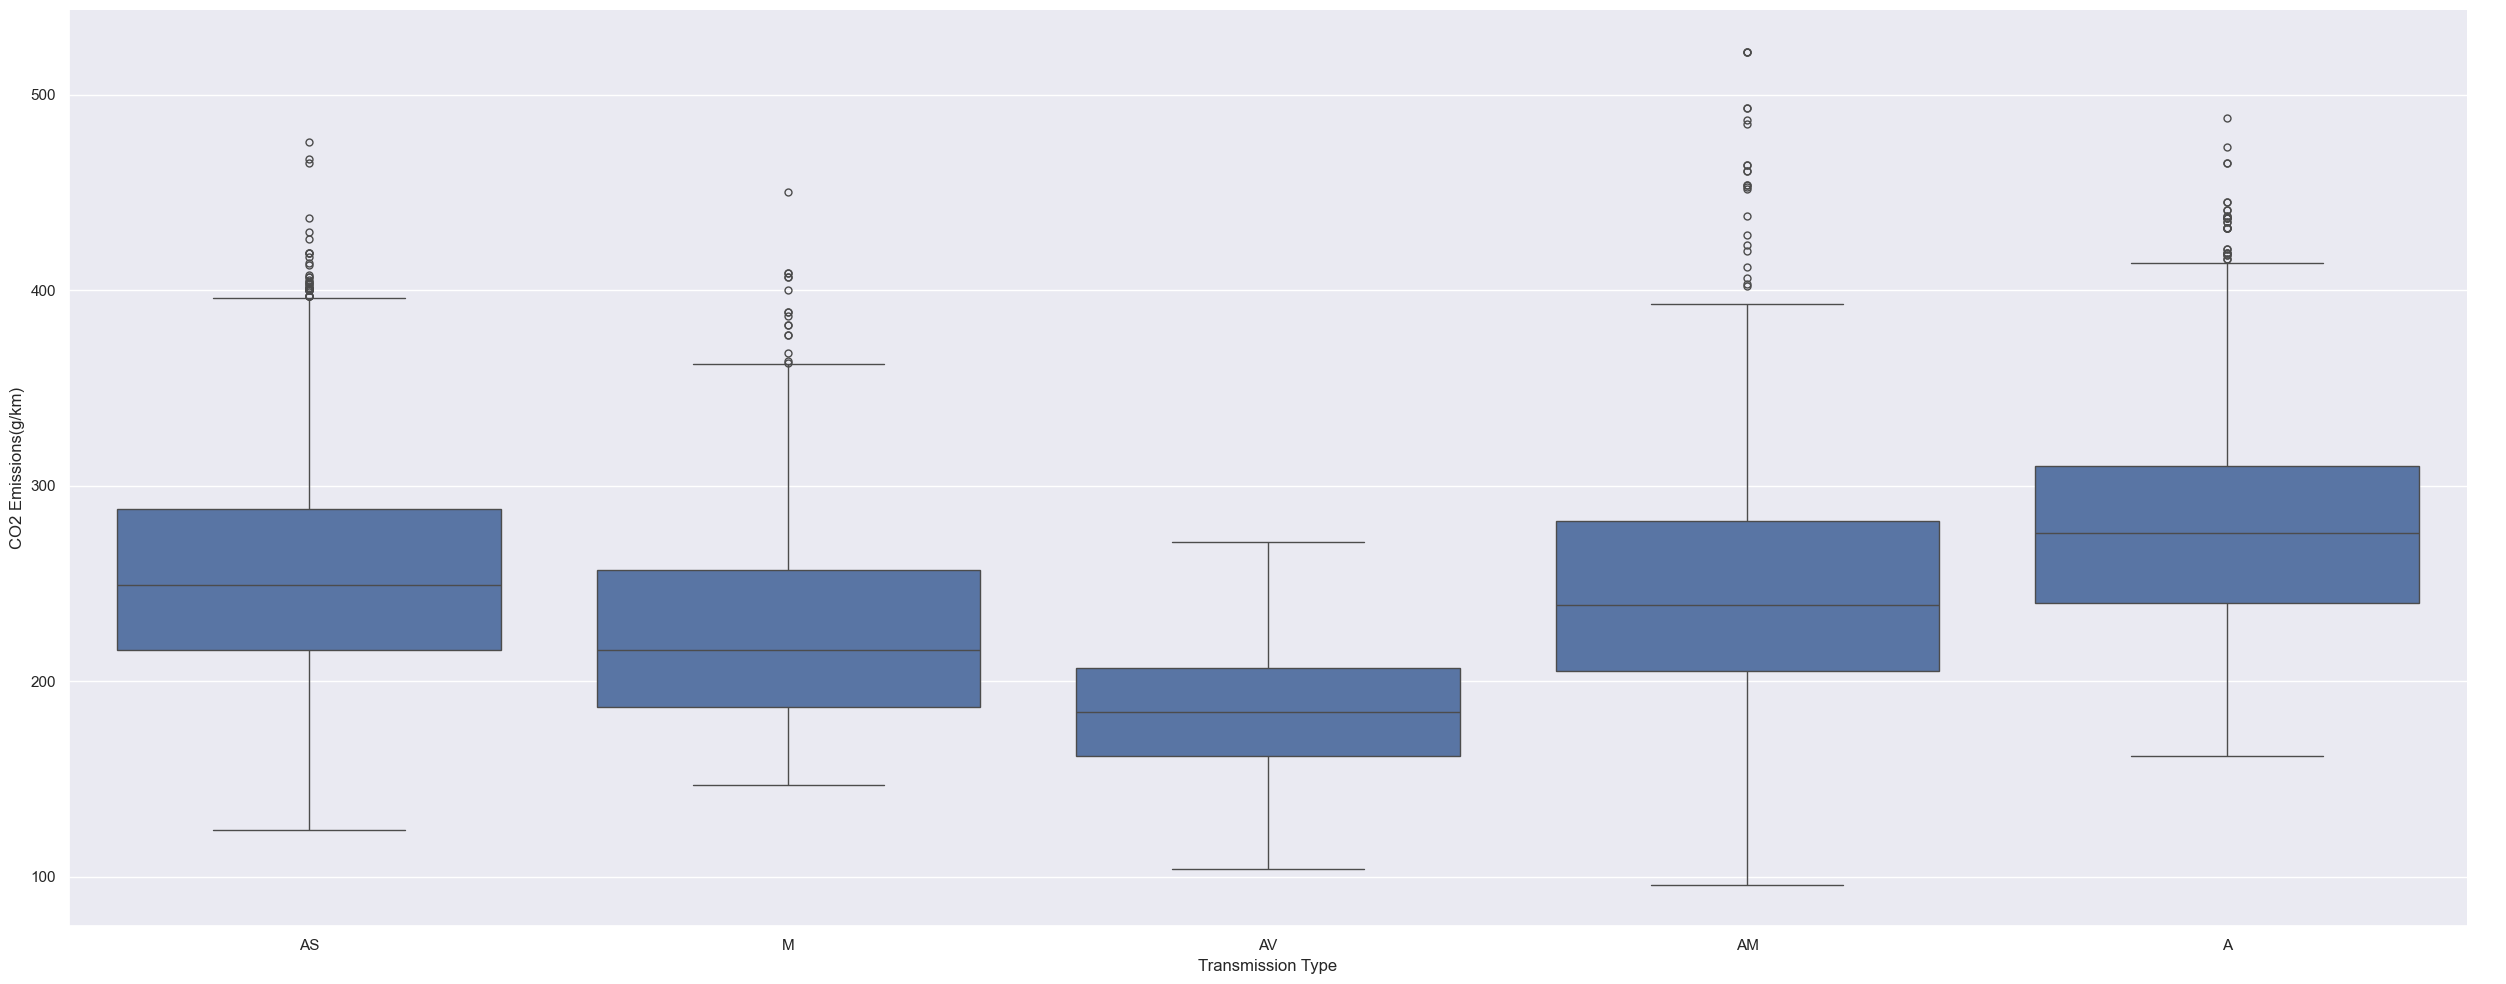

In [28]:

count = 0
list_var = ["Vehicle Class",  "Fuel Type", "Cylinders", "Gears", "Transmission Type"]
for var in list_var:
    sb.catplot(data=cd_data, x=var, y= "CO2 Emissions(g/km)", height = 10, aspect=2.5, kind='box')
    


**Vehicle Class**: The CO2 Emissions of a vehicle seems to differ between most classes of vehicles, as most of the boxplots are at different levels. However, most classes of vehicles seem to have a median CO2 Emissions of around 200-270g/km, with vehicles from classes SUV - STANDARD, VAN - CARGO, VAN - PASSENGER and PICKUP TRUCK - STANDARD above this level. More specifically, the VAN - PASSENGER level has a median of over 400g/km - the most of any level of this variable.\
**Cylinders**: The number of cylinders seems to follow a linear relation with the CO2 Emissions. Across the board, the higher the number of cylinders, the higher the CO2 Emissions. This is evident from the increasing median across all levels in the boxplots.\
**Fuel Type**: In general, the fuel type of a car does not seem to impact the amount of CO2 Emissions of a car, as all boxplots of the different fuel types are around the same level with similar medians, the only exception being cars using Ethanol as fuel, which as a slightly higher median compared to the rest.\
**Transmission Type**: The transmission type of a vehicle also seems to have an impact on the CO2 Emissions of a car. According to the medians of each boxplot, cars with AV type (Continuously Variable types) emit the least CO2, followed by M (manual cars), then AM (automated manual cars), then AS (automatic with select shift), with cars of transmission type A (Automatic) emitting the most CO2.


## Bivariate analysis
We will now investigate the relationship between each of the 6 of our chosen predictor variables, and the result variable (CO2 Emissions).

#### Engine Size vs CO2 Emissions

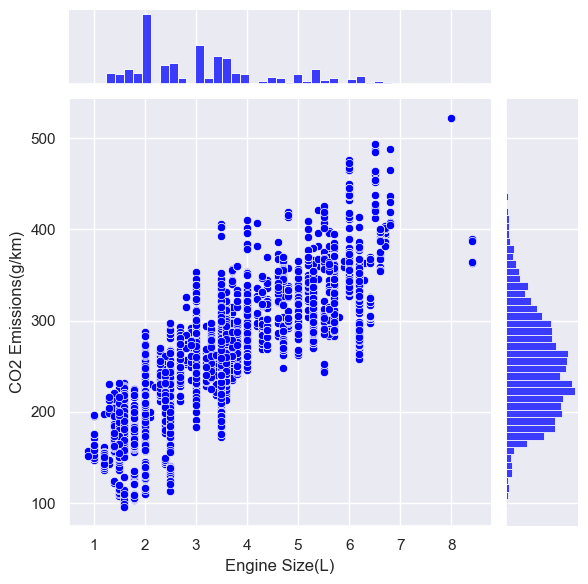

In [29]:
sb.jointplot(data = cd_data, x = "Engine Size(L)", y = "CO2 Emissions(g/km)", height = 6, color = "blue")

<Axes: >

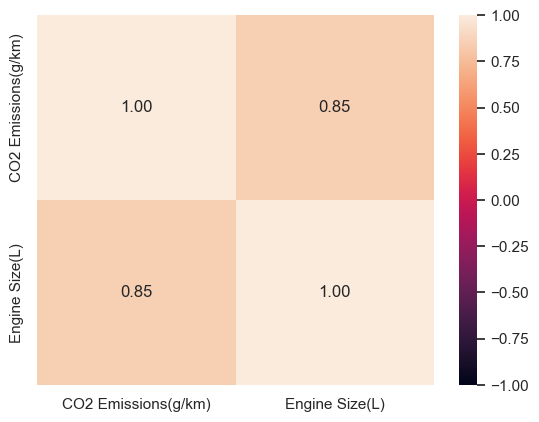

In [30]:

co2VSenginesizeDF = pd.concat([cd_data["CO2 Emissions(g/km)"], cd_data["Engine Size(L)"]], axis = 1).reindex(cd_data["CO2 Emissions(g/km)"].index)
sb.heatmap(data = co2VSenginesizeDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

From the correlation matrix, we see there is a significant correlation index of 0.85. This suggests that Engine Size has a strong relationship with CO2 Emissions, and should be considered a significant predictor variable in our regression model.

#### Fuel Consumption Comb (L/100 km) vs CO2 Emissions

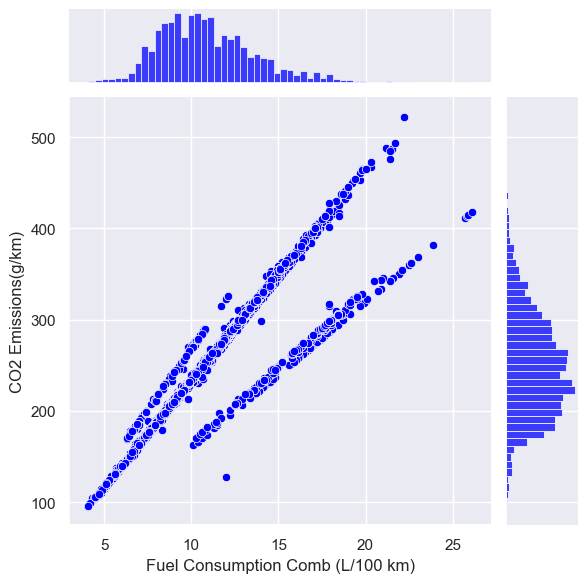

In [31]:
sb.jointplot(data = cd_data, x = "Fuel Consumption Comb (L/100 km)", y = "CO2 Emissions(g/km)", height = 6, color = "blue")
#erm something weird going on here

<Axes: >

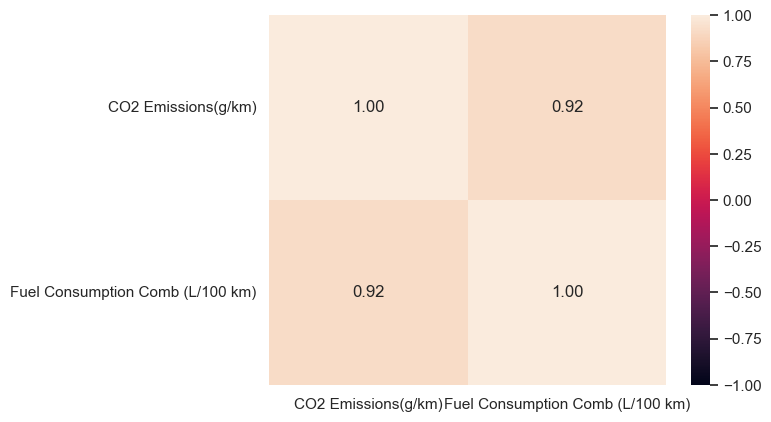

In [32]:

co2VSfuelconsumptionDF = pd.concat([cd_data["CO2 Emissions(g/km)"], cd_data["Fuel Consumption Comb (L/100 km)"]], axis = 1).reindex(cd_data["CO2 Emissions(g/km)"].index)
sb.heatmap(data = co2VSfuelconsumptionDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

From the correlation matrix, we see there is a significant correlation index of 0.92. This suggests that Fuel Consumption Comb (L/100km) has a strong relationship with CO2 Emissions, and should be considered a significant predictor variable in our regression model.

#### Number of cylinders (categorical) vs CO2 Emissions

<Axes: xlabel='Cylinders', ylabel='CO2 Emissions(g/km)'>

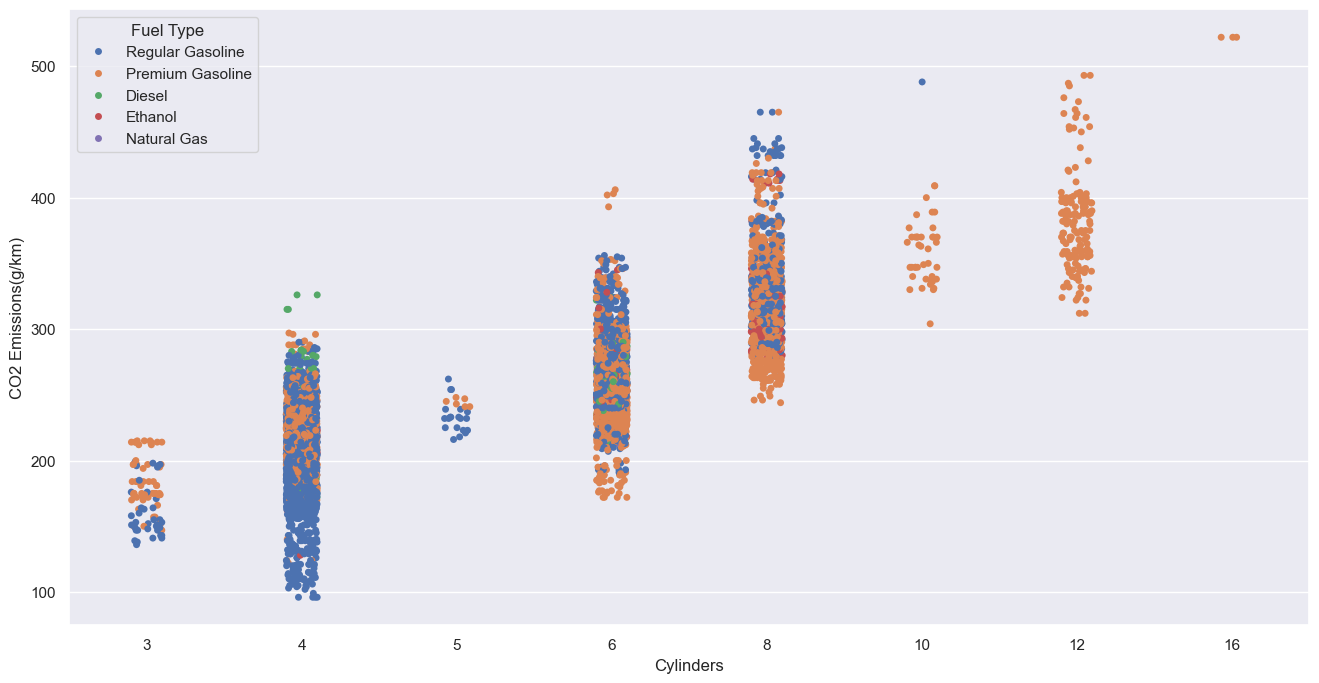

In [33]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Cylinders', y = 'CO2 Emissions(g/km)', data = cd_data, hue = "Fuel Type")

It appears to be the case that the cars with more cylinders tend to be the cars that use Premium Gasoline. However, we also notice from our prior data preparation that Premium Gasoline is the second most used fuel type (with 3202 cars using it out of a possible 7385), and as such there may not be a significant relationship. We shall attempt a chi square test to test for the independency of these 2 categorical variables, which are Fuel Type and Number Of Cylinders.


In [34]:
from scipy.stats import chi2_contingency
chi2, p_value, dof, ex = chi2_contingency(pd.crosstab(cd_data["Cylinders"], cd_data["Fuel Type"]))
p_value

2.56863950034083e-198

Our null hypothesis is that the Number of Cylinders is independent from Fuel Type. Our chi squared test returned a p-value that is very close to 0. Using a 95% confidence test, we found that p-value was much smaller than the alpha level of 0.05, so we do not reject the null hypothesis. We can say that the 2 variables are independent from each other.

#### Fuel Type vs CO2 Emissions

<Axes: xlabel='Fuel Type', ylabel='CO2 Emissions(g/km)'>

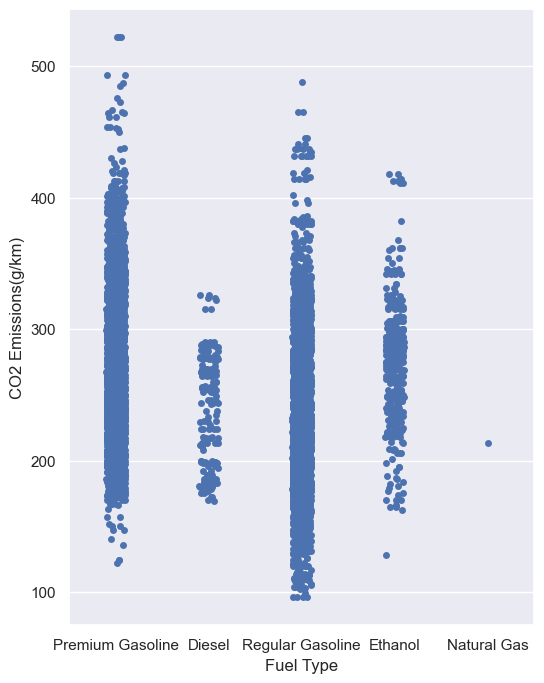

In [37]:
f = plt.figure(figsize=(6, 8))
sb.stripplot(x = 'Fuel Type', y = 'CO2 Emissions(g/km)', data = cd_data)

#### Transmission type vs CO2 Emissions

<Axes: xlabel='Transmission Type', ylabel='CO2 Emissions(g/km)'>

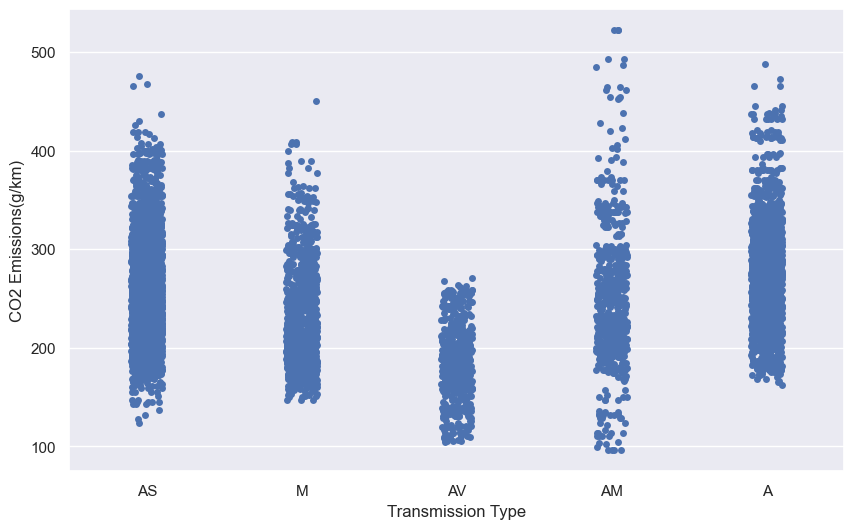

In [38]:
f = plt.figure(figsize=(10, 6))
sb.stripplot(x = 'Transmission Type', y = 'CO2 Emissions(g/km)', data = cd_data)

### Analysing the relationship between the predictor variables:

In [39]:
onehotencodingdata = cd_data.copy()
encoded_data = ['Fuel Type', 'Vehicle Class', 'Transmission Type']
encoded_data_prefix = ['FT', 'VClass', 'TType']
for col, per in zip(encoded_data, encoded_data_prefix):
  dummies = pd.get_dummies(onehotencodingdata[col], prefix=per, drop_first=False)
  onehotencodingdata = onehotencodingdata.join(dummies)

removable_data = encoded_data + ['Make', 'Model','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)', 'Transmission']

removable_data

['Fuel Type',
 'Vehicle Class',
 'Transmission Type',
 'Make',
 'Model',
 'Fuel Consumption City (L/100 km)',
 'Fuel Consumption Hwy (L/100 km)',
 'Fuel Consumption Comb (mpg)',
 'CO2 Emissions(g/km)',
 'Transmission']

In [40]:
final_data = onehotencodingdata.drop(removable_data, axis=1)
final_data.head(20)

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),Gears,FT_Diesel,FT_Ethanol,FT_Natural Gas,FT_Premium Gasoline,FT_Regular Gasoline,VClass_COMPACT,...,VClass_SUV - SMALL,VClass_SUV - STANDARD,VClass_TWO-SEATER,VClass_VAN - CARGO,VClass_VAN - PASSENGER,TType_A,TType_AM,TType_AS,TType_AV,TType_M
0,2.0,4,8.5,5,False,False,False,True,False,True,...,False,False,False,False,False,False,False,True,False,False
1,2.4,4,9.6,6,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
2,1.5,4,5.9,7,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,True,False
3,3.5,6,11.1,6,False,False,False,True,False,False,...,True,False,False,False,False,False,False,True,False,False
4,3.5,6,10.6,6,False,False,False,True,False,False,...,True,False,False,False,False,False,False,True,False,False
5,3.5,6,10.0,6,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
6,3.5,6,10.1,6,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
7,3.7,6,11.1,6,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
8,3.7,6,11.6,6,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
9,2.4,4,9.2,5,False,False,False,True,False,True,...,False,False,False,False,False,False,False,True,False,False


# Creating a regression model to predict emissions of a vehicle 

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [42]:
X = final_data

In [43]:
Y = cd_data["CO2 Emissions(g/km)"]

In [48]:
linreg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 69)
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (5908,) (5908, 30)
Test Set  : (1477,) (1477, 30)


In [49]:
X_train.describe()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),Gears
count,5908.000000,5908.000000,5908.000000,5908.000000
mean,3.172190,5.630332,10.987187,6.661814
std,1.359343,1.843764,2.893988,1.646225
min,0.900000,3.000000,4.100000,1.000000
25%,2.000000,4.000000,8.900000,6.000000
50%,3.000000,6.000000,10.600000,6.000000
75%,3.700000,6.000000,12.600000,8.000000
max,8.400000,16.000000,26.100000,10.000000


In [50]:
y_train.describe()

count    5908.000000
mean      250.778436
std        58.590462
min        96.000000
25%       208.000000
50%       246.000000
75%       289.000000
max       522.000000
Name: CO2 Emissions(g/km), dtype: float64

### Model 1: Multilinear Regression Model

In [54]:
#we fit our train data onto our multilinear regression model
linreg.fit(X_train, y_train)

LinearRegression()

In [55]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  3480518318450.604
Coefficients 	: a =  [ 2.03599584e-01  5.28437226e-01  2.24028356e+01  4.61774843e-01
 -1.14901978e+12 -1.14901978e+12 -1.14901978e+12 -1.14901978e+12
 -1.14901978e+12  2.08158713e+12  2.08158713e+12  2.08158713e+12
  2.08158713e+12  2.08158713e+12  2.08158713e+12  2.08158713e+12
  2.08158713e+12  2.08158713e+12  2.08158713e+12  2.08158713e+12
  2.08158713e+12  2.08158713e+12  2.08158713e+12  2.08158713e+12
  2.08158713e+12 -4.41308567e+12 -4.41308567e+12 -4.41308567e+12
 -4.41308567e+12 -4.41308567e+12]


In [64]:
from sklearn.metrics import mean_squared_error

y_train_pred = linreg.predict(X_train)

print("Metrics of the Multilinear Regression Model on Train Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))

y_test_pred = linreg.predict(X_test)

Metrics of the Multilinear Regression Model on Train Dataset
Explained Variance (R^2) 	: 0.9925088611853542
Mean Squared Error (MSE) 	: 25.711544847722465
Root Mean Squared Error (RMSE) 	: 5.07065526808148


In [65]:
print("Metrics of the Multilinear Regression Model on Test Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
StdE_pred = np.sqrt(len(y_train) * mean_squared_error(y_train, y_train_pred) /(len(y_train) - 2))
print("Standard Error of Prediction \t:",StdE_pred)
print()

Metrics of the Multilinear Regression Model on Test Dataset
Explained Variance (R^2) 	: 0.9917128771628833
Mean Squared Error (MSE) 	: 28.064796183346573
Root Mean Squared Error (RMSE) 	: 5.297621747855029
Standard Error of Prediction 	: 5.071513755392817



In [73]:
# to check the original data's CO2 Emissions mean to serve as a rough sense of scale when deciding if RMSE values are significant.
print("The mean of CO2 Emisisons: ", cd_data["CO2 Emissions(g/km)"].mean())

The mean of CO2 Emisisons:  250.58469871360867


Comparing R^2 values for both Train and Test datasets, we see that the Explained Variance for both are very close to the maximum of 1, which suggests that the model has an excellent goodness of fit. Comparing the RMSE values for both datasets, again they are very similar, and approximately 50 times less than the mean of the CO2 Emissions predictor variable. This suggests that RMSE for both datasets is not significant compared to CO2 Emissions. So, the prediction accuracy of the model is also very good.

### Model 2: Ridge Regression

In [75]:
X = final_data

In [76]:
Y = cd_data["CO2 Emissions(g/km)"]

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=69)
print("The dimension of X_train is {}".format(x_train.shape))
print("The dimension of X_test is {}".format(x_test.shape))

The dimension of X_train is (5908, 30)
The dimension of X_test is (1477, 30)


In [83]:
#We scale our data so that we remove any incorrect penalisation of our loss function. This allows for a more optimal model after regularisation is done.
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
predictors_train = scale.fit_transform(x_train)
predictors_test = scale.transform(x_test)

In [79]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [93]:
#we try to identify the alpha value that gives the best results
grid = {'alpha': [(0.00001 * 10**x) for x in range(1, 8)] }
from sklearn.model_selection import GridSearchCV
ridge_cv = GridSearchCV(ridge, grid, cv=3, n_jobs=1)
ridge_cv.fit(x_train, y_train)
y_pred = ridge_cv.predict(x_test)

In [94]:
ridge_cv.best_estimator_

Ridge(alpha=0.1)

In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mean_absolute_error(y_test, y_pred)

3.0285132906629437

In [95]:
mean_squared_error(y_test, y_pred)


28.055177179932354

In [86]:
r2_score(y_test, y_pred)

0.9917157175135611

In [ ]:
ridge_cv.best_estimator_.intercept_

-30.179686562529582

In [ ]:
ridge_cv.best_estimator_.coef_

array([ 1.99008822e-01,  5.40116293e-01,  2.23924144e+01,  4.62022334e-01,
        6.14667381e+01, -8.02314325e+01, -4.46382125e+01,  3.15613457e+01,
        3.18415613e+01,  9.43534353e-01,  2.37225018e+00,  1.15643695e+00,
        6.79048252e-01,  1.77840877e+00,  4.40331598e+00,  2.05102568e+00,
        5.15974686e+00,  1.41656018e+00,  7.24440318e-01,  1.24031473e+00,
        2.12045431e+00,  1.64003536e+00,  1.58181826e+00, -1.69346709e+01,
       -1.03327193e+01,  9.72471036e-02,  3.96752880e-01,  1.23574866e-02,
       -5.26353273e-01,  1.99958025e-02])

In [ ]:
X = final_data
y = cd_data["CO2 Emissions(g/km)"] 
 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69) 
print("The dimension of X_train is {}".format(X_train.shape)) 
print("The dimension of X_test is {}".format(X_test.shape))

from sklearn.linear_model import Lasso 
from sklearn.linear_model import LassoCV 
 
 
possible_alpha_list = [(0.00001 * 10**x) for x in range(1, 8)] 
lasso_cv = LassoCV(alphas = possible_alpha_list, random_state = 69).fit(X_train, y_train) 
 
train_score_lasso =lasso_cv.score(X_train,y_train) 
test_score_lasso =lasso_cv.score(X_test,y_test)
print(train_score_lasso)
print(test_score_lasso)

The dimension of X_train is (5908, 30)
The dimension of X_test is (1477, 30)
0.9925068542218524
0.9917194726455026
